<h1><b>Engine - Rating Prediction</b></h1>
Submitted by: <i>Ujwal Kumar, BT CHE</i>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
#Reading Dataset
url = 'https://docs.google.com/spreadsheets/d/11XCamO4HcK_WhiZ3U6rP-RY-ZsZujYzi/edit?usp=sharing&ouid=113699057824459139905&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df=pd.read_excel(path)

In [ ]:
print(df.shape)
df

(26307, 73)


,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,S

In [ ]:
df.describe()

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,0.0,0.0,26307.000000,26307.000000
mean,2010.856578,5.462006,NaN,NaN,76460.143764,3.624663
std,3.766234,3.583866,NaN,NaN,46762.524489,0.847645
min,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2008.000000,2.000000,NaN,NaN,46396.000000,3.500000
50%,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2014.000000,9.000000,NaN,NaN,98289.500000,4.000000
max,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object        
 6   engineTransmission_battery_cc_value_1                      430 non-null    object        
 7   engineTransmission_battery_cc_v

It can be clearly seen that there are various features in the dataset which have very few non-null values, i.e. several features have null values. Let us have a detailed analysis over such features.

In [ ]:
#Checking for null values in the dataset
missing=df.isnull().sum()
missing=missing[missing>0] #Selecting the features which have null values present in therm

#Creating a dataframe consisting of name of the feature(Feature) and number of null entries in that column/feature(Frequency)
missing=pd.DataFrame({'Feature':missing.index, 'Frequency':missing.values}) 


In [ ]:
missing
# There are 53 columns/features which have missing values 

,Feature,Frequency
0,engineTransmission_battery_cc_value_0,22869
1,engineTransmission_battery_cc_value_1,25877
2,engineTransmission_battery_cc_value_2,26235
3,engineTransmission_battery_cc_value_3,26291
4,engineTransmission_battery_cc_value_4,26303
5,engineTransmission_engineOilLevelDipstick_cc_v...,25896
6,engineTransmission_engineOil_cc_value_0,7750
7,engineTransmission_engineOil_cc_value_1,15303
8,engineTransmission_engineOil_cc_value_2,19714
9,engineTransmission_engineOil_cc_value_3,22565


In [ ]:
#Features which need to be dropped. Generally, if a feature has large amount of missing values (more than 50%), its better to drop the column/field. 
drop_feature=missing[missing['Frequency']>13154] 
for i in drop_feature['Feature']:
  df.drop(i,axis=1,inplace=True)

Lets analyse the features in which the missing values are less than 50%. There are three such features.

In [ ]:
missing1=missing[missing['Frequency']<=13154]
missing1

,Feature,Frequency
6,engineTransmission_engineOil_cc_value_0,7750
32,engineTransmission_engineSound_cc_value_0,7227
33,engineTransmission_engineSound_cc_value_1,12802


In [ ]:
df['engineTransmission_engineOil_cc_value_0'].value_counts()
# Here, 18557 records are classified into 9 classes. 

Leaking                               7892
Dirty                                 6906
Level Low                             2739
Leakage from Tappet Cover              716
Leakage from Side cover                221
Leakage from Sump/chamber               50
Leakage from Turbo Charger              31
Low Pressure warning light glowing       1
Mixed with Coolant                       1
Name: engineTransmission_engineOil_cc_value_0, dtype: int64

In [ ]:
df['engineTransmission_engineSound_cc_value_0'].value_counts()
# Here, 19080 records are classified into 7 classes. 

Timing Noise              8170
Tappet Noise              3934
Alternator Brg Noise      3700
Whistling Noise-Turbo     1685
Engine Auxiliary Noise     936
Water Pump Brg Noise       408
Injector Noise             247
Name: engineTransmission_engineSound_cc_value_0, dtype: int64

In [ ]:
df['engineTransmission_engineSound_cc_value_1'].value_counts()
# Here, 13505 records are classified into 6 classes. 

Tappet Noise              7571
Timing Noise              2881
Engine Auxiliary Noise    1258
Water Pump Brg Noise       793
Injector Noise             555
Alternator Brg Noise       447
Name: engineTransmission_engineSound_cc_value_1, dtype: int64

All the three features are categorical. There is no such biasness observed towards one class, i.e. each class has a certain number of records present in it, hence we cannot assign all the missing values to a particular class, neither we can drop these rows as they are large in number.

Now, let us drop these three fields and continue with the non-null fields

Also, appointmentId, inspectionStartTime, year,	month are removed from the dataframe as it doesn't provide much information regarding the prediction of engine rating.

In [ ]:
df.drop('appointmentId',axis=1,inplace=True)
df.drop('inspectionStartTime',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)

In [ ]:
df1=df.copy()
for i in missing1['Feature']:
  df1.drop(i,axis=1,inplace=True)

In [ ]:
for i in df1.columns:
  print(i,": ",df1[i].unique())

engineTransmission_battery_value :  ['No' 'Yes']
engineTransmission_engineoilLevelDipstick_value :  ['Yes' 'No']
engineTransmission_engineOil :  ['No' 'Yes']
engineTransmission_engine_value :  ['No' 'Yes']
engineTransmission_coolant_value :  ['No' 'Yes']
engineTransmission_engineMounting_value :  ['No' 'Yes']
engineTransmission_engineSound_value :  ['No' 'Yes']
engineTransmission_exhaustSmoke_value :  ['No' 'Yes']
engineTransmission_engineBlowByBackCompression_value :  ['No' 'Yes']
engineTransmission_engineBlowByBackCompression_cc_value_0 :  ['Back Compression Exist' 'NO Blow-by' 'Perm. Blow By on idle'
 'Perm. blow by & oil spillage on idle' 'Oil spillage on Idle']
engineTransmission_clutch_value :  ['No' 'Yes']
engineTransmission_gearShifting_value :  ['Yes' 'No']
fuel_type :  ['Petrol + CNG' 'Diesel' 'Petrol' 'Petrol + LPG' 'Hybrid' 'Electric']
odometer_reading :  [124600  78108  93348 ...  88051 126015  23983]
rating_engineTransmission :  [3.  4.  3.5 4.5 5.  1.  2.  2.5 1.5 0.5]


In [ ]:
df1['engineTransmission_engineBlowByBackCompression_cc_value_0'].unique()

array(['Back Compression Exist', 'NO Blow-by', 'Perm. Blow By on idle',
       'Perm. blow by & oil spillage on idle', 'Oil spillage on Idle'],
      dtype=object)

Now, we will encode the categorical features into numerical values. For eg. if a feature has two classes, Yes or No, then we can represent Yes as 1 and No as 0.

In [ ]:
for i in df1.columns:
  if(len(df1[i].unique())==2):
     df1[i].replace(('Yes', 'No'), (1, 0), inplace=True)

Now, the features which have multiclass classification ('engineTransmission_engineBlowByBackCompression_cc_value_0' , 'fuel_type') are encoded using pandas: pd.get_dummies

In [ ]:
df1['engineTransmission_engineBlowByBackCompression_cc_value_0']=pd.get_dummies(df1['engineTransmission_engineBlowByBackCompression_cc_value_0'])
df1['fuel_type']=pd.get_dummies(df1['fuel_type'])

odometer_reading is a field which is not categorical, i.e. it is numerically continuous. Let us analyse this field.

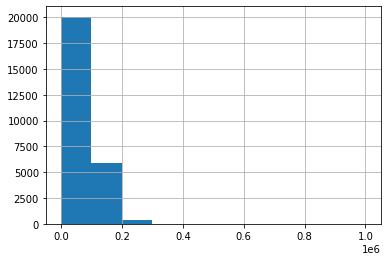

In [ ]:
df1['odometer_reading'].hist()
plt.show()

Detecting Outliers 

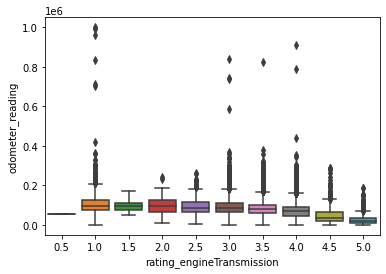

In [ ]:
#Plotting a boxplot of odometer_reading vs rating_engineTransmission
sns.boxplot(x=df1['rating_engineTransmission'],y=df1['odometer_reading'])

It can be clearly seen that there are some outliers present in the dataset. The outliers are the points where the 
odometer_reading>500000. The threshold 500000 is obtained by observation. These data points are removed.

In [ ]:
idx=df1[df1['odometer_reading']>500000].index
df1.drop(idx,inplace=True)

In [ ]:
print("No. of data points/records removed are: ",len(idx))

No. of data points/records removed are:  13


In [ ]:
df1['rating_engineTransmission'].value_counts()

4.0    10150
3.5     5943
3.0     4375
4.5     2209
5.0     1623
1.0     1450
2.5      420
2.0      117
1.5        6
0.5        1
Name: rating_engineTransmission, dtype: int64

There are in total 10 classes, out of which the most frequent is 4.0 whereas the least frequent are 1.5 and 0.5

<BarContainer object of 10 artists>

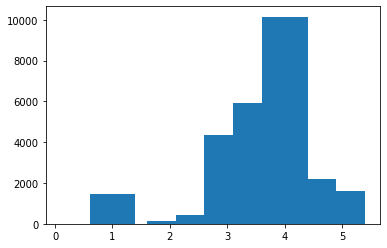

In [ ]:
freq=df1['rating_engineTransmission'].value_counts()
freq=pd.DataFrame({'Label':freq.index, 'Freq':freq.values})
plt.bar(freq['Label'],freq['Freq'])

# Data Preprocessing

In [ ]:
#Normalising odometer_reading variable
odometer_reading_mean1=df1['odometer_reading'].mean()
odometer_reading_std1=df1['odometer_reading'].std()
df1['odometer_reading']=(df1['odometer_reading']-odometer_reading_mean1)/(odometer_reading_std1)

In [ ]:
#Encoding the target label using LabelEncoder
encoder = LabelEncoder()
encoder.fit(df1['rating_engineTransmission'])
df1['rating_engineTransmission']= encoder.transform(df1['rating_engineTransmission'])

In [ ]:
#Separating the features and target variable from the dataframe
y=df1['rating_engineTransmission']
X=df1.drop('rating_engineTransmission',axis=1)

In [ ]:
#Splitting the data into training set & test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Model Building

XGBoost

In [ ]:
clf = xgb.XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=1000, 
                        num_classes=10)
clf.fit(X_train, Y_train)  
pred = clf.predict(X_test)

In [ ]:
acc_xgb=accuracy_score(pred,Y_test)
print(acc_xgb)

0.49011406844106464


In [ ]:
filename = 'XGB.sav' # XGB: is the new model name for XGB
pickle.dump(clf, open(filename, 'wb')) 

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train,Y_train)
y_pred = randomforest.predict(X_test)

acc_rf=accuracy_score(y_pred,Y_test)
print('Accuracy obtained: ',accuracy_score(y_pred,Y_test))

Accuracy obtained:  0.3870722433460076


In [ ]:
filename = 'RF.sav' # RF: is the new model name for RandomForest
pickle.dump(randomforest, open(filename, 'wb'))

In [ ]:
Y_train1 = np_utils.to_categorical(Y_train)
Y_test1 = np_utils.to_categorical(Y_test)

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(11,activation='relu',input_dim=14))
#model.add(tf.keras.layers.Dense(10,activation='relu',input_dim=12))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
740/740 [==============================] - 2s 2ms/step - loss: 1.5655 - accuracy: 0.3952
Epoch 2/50
740/740 [==============================] - 1s 2ms/step - loss: 1.2808 - accuracy: 0.4712
Epoch 3/50
740/740 [==============================] - 1s 2ms/step - loss: 1.2413 - accuracy: 0.4884
Epoch 4/50
740/740 [==============================] - 1s 2ms/step - loss: 1.2279 - accuracy: 0.4925
Epoch 5/50
740/740 [==============================] - 1s 2ms/step - loss: 1.2205 - accuracy: 0.4954
Epoch 6/50
740/740 [==============================] - 1s 2ms/step - loss: 1.2134 - accuracy: 0.4951
Epoch 7/50
740/740 [==============================] - 1s 2ms/step - loss: 1.2082 - accuracy: 0.4949
Epoch 8/50
740/740 [==============================] - 1s 2ms/step - loss: 1.2033 - accuracy: 0.4958
Epoch 9/50
740/740 [==============================] - 1s 2ms/step - loss: 1.1991 - accuracy: 0.4995
Epoch 10/50
740/740 [==============================] - 1s 2ms/step - loss: 1.1960 - accuracy: 0.5014

In [ ]:
model.evaluate(X_test,Y_test)

83/83 [==============================] - 0s 2ms/step - loss: 1.2052 - accuracy: 0.5015


[1.2051701545715332, 0.5015209317207336]

In [ ]:
filename = 'NN.sav' # XGB: is the new model name for XGB
pickle.dump(model, open(filename, 'wb')) 

INFO:tensorflow:Assets written to: ram://657c7a14-8927-4dc5-958b-3b53538dcac0/assets
